# Imports

In [1]:
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pickle

data_dir = "logs/epoch_data/"
label_dir = "data/ny/"

# Data loading

In [2]:
with open(label_dir + "new_labels.pkl", "rb") as infile:
    labels = np.array(pickle.load(infile))

In [3]:
with open(data_dir + "2022-01-21_053031.pkl", "rb") as infile:
    requests_lstm_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_033809.pkl", "rb") as infile:
    income_lstm_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_055006.pkl", "rb") as infile:
    driver_lstm_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_070409.pkl", "rb") as infile:
    rider_lstm_50 = pickle.load(infile)

In [4]:
with open(data_dir + "2022-01-21_031618.pkl", "rb") as infile:
    requests_lstm_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_012838.pkl", "rb") as infile:
    income_lstm_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_114834.pkl", "rb") as infile:
    driver_lstm_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_105545.pkl", "rb") as infile:
    rider_lstm_200 = pickle.load(infile)

In [5]:
with open(data_dir + "2022-01-21_142420.pkl", "rb") as infile:
    requests_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-22_003146.pkl", "rb") as infile:
    income_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-22_024518.pkl", "rb") as infile:
    driver_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-22_002914.pkl", "rb") as infile:
    rider_50 = pickle.load(infile)

In [6]:
with open(data_dir + "2022-01-21_225712.pkl", "rb") as infile:
    requests_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_222213.pkl", "rb") as infile:
    income_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-22_083956.pkl", "rb") as infile:
    driver_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-22_035755.pkl", "rb") as infile:
    rider_200 = pickle.load(infile)

# Functions

In [7]:
def get_success_rate_plot(stats, labels, plot_labels, n_drivers, lim_x=None, lim_y=None):
    for i, stat in enumerate(stats):
        total_ratio = stat['total_requests_accepted'] / sum(stat['epoch_requests_seen'])
        all_accepted_locations = list(itertools.chain(*stat["epoch_locations_accepted"]))
        all_accepted_neighborhoods = labels[all_accepted_locations]
        accepted_counter = Counter(all_accepted_neighborhoods)
        all_locations = list(itertools.chain(*stat["epoch_locations_all"]))
        all_neighborhoods = labels[all_locations]
        all_counter = Counter(all_neighborhoods)
        neighborhood_ratios = np.array([v for (k, v) in sorted(accepted_counter.items())]) / np.array([v for (k, v) in sorted(all_counter.items())])
        min_ratio = neighborhood_ratios.min()
        plt.plot(total_ratio, min_ratio, "*", label=plot_labels[i])
    plt.title(f"{n_drivers} Drivers")
    plt.xlabel("Overall Success Rate")
    plt.ylabel("Minimum Request Success Rate")
    plt.legend(loc="best")
    if lim_x:
        plt.xlim(lim_x)
    if lim_y:
        plt.ylim(lim_y)
    plt.show()    

In [8]:
def get_income_dist_plot(stats, plot_labels, n_drivers, lim_x=None):
    profits_per_agent = np.zeros((n_drivers, len(stats)))
    for i, stat in enumerate(stats):
        agent_profits = list(itertools.chain(*stat["epoch_each_agent_profit"]))
        for p in agent_profits:
            profits_per_agent[p[0], i] += p[1]
    plt.boxplot(profits_per_agent, vert=False, labels=plot_labels)
    plt.title("Income by Objective Function")
    plt.xlabel("Payment ($)")
    plt.ylabel("Policy")
    if lim_x:
        plt.xlim(lim_x)
    plt.show()    

In [9]:
def get_total_income_bar_plot(stats, plot_labels):
    incs = []
    for stat in stats:
        inc = sum(stat["epoch_requests_accepted_profit"])
        incs.append(inc)
    plt.bar(np.arange(len(stats)), incs)
    plt.title("Total income by Objective Function")
    plt.xticks(np.arange(len(stats)), plot_labels)
    plt.ylabel("Payment ($)")
    plt.show()

## Original model, original data

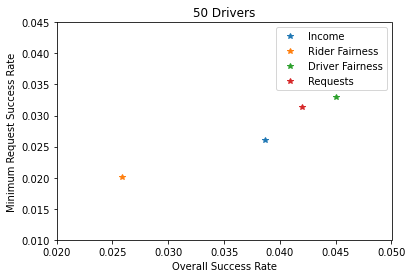

In [10]:
get_success_rate_plot([income_lstm_50, rider_lstm_50, driver_lstm_50, requests_lstm_50], labels, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50, (0.020, 0.050), (0.010, 0.045))

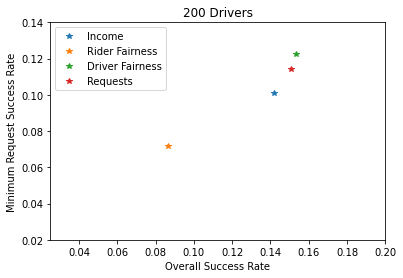

In [11]:
get_success_rate_plot([income_lstm_200, rider_lstm_200, driver_lstm_200, requests_lstm_200], labels, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200, (0.025, 0.200), (0.02, 0.14))

### 50 drivers

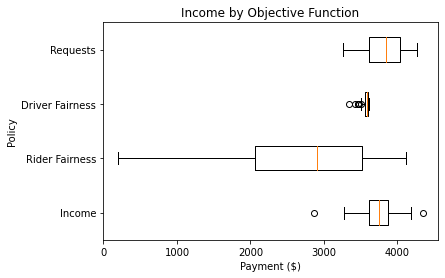

In [12]:
get_income_dist_plot([income_lstm_50, rider_lstm_50, driver_lstm_50, requests_lstm_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50)

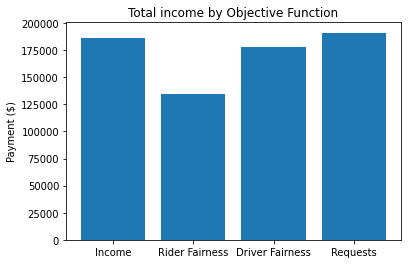

In [13]:
get_total_income_bar_plot([income_lstm_50, rider_lstm_50, driver_lstm_50, requests_lstm_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"])

### 200 drivers

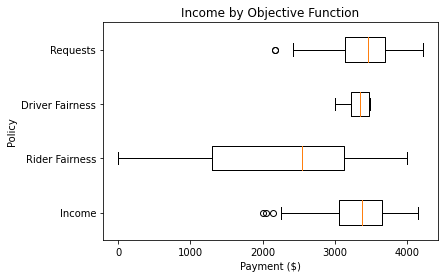

In [14]:
get_income_dist_plot([income_lstm_200, rider_lstm_200, driver_lstm_200, requests_lstm_200], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200)

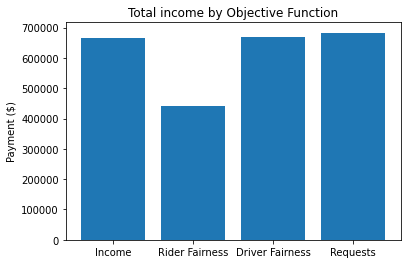

In [15]:
get_total_income_bar_plot([income_lstm_200, rider_lstm_200, driver_lstm_200, requests_lstm_200], ["Income", "Rider Fairness", "Driver Fairness", "Requests"])

## Model without LSTM, original data

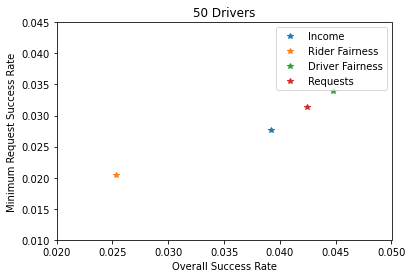

In [16]:
get_success_rate_plot([income_50, rider_50, driver_50, requests_50], labels, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50, (0.020, 0.050), (0.010, 0.045))

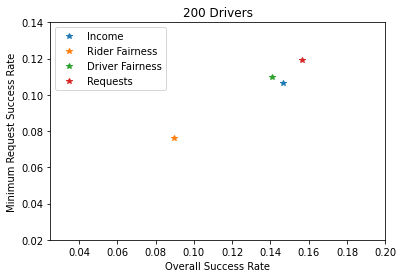

In [17]:
get_success_rate_plot([income_200, rider_200, driver_200, requests_200], labels, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200, (0.025, 0.200), (0.02, 0.14))

### 50 drivers

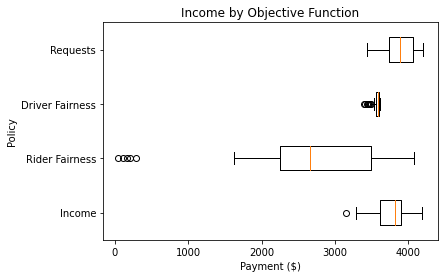

In [18]:
get_income_dist_plot([income_50, rider_50, driver_50, requests_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50)

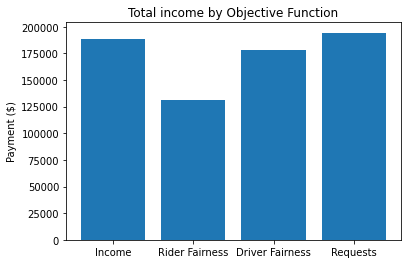

In [19]:
get_total_income_bar_plot([income_50, rider_50, driver_50, requests_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"])

### 200 drivers

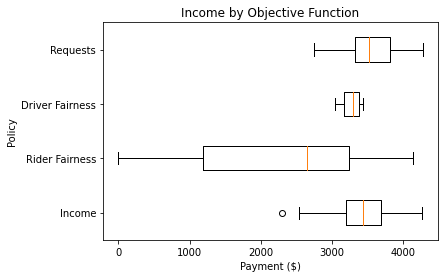

In [20]:
get_income_dist_plot([income_200, rider_200, driver_200, requests_200], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200)

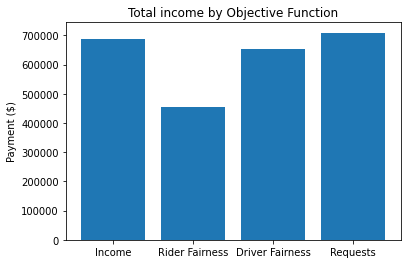

In [21]:
get_total_income_bar_plot([income_200, rider_200, driver_200, requests_200], ["Income", "Rider Fairness", "Driver Fairness", "Requests"])